In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import os
import pickle
import utils


In [2]:

equation_dict = {
    'poisson_2d-sin_cos':'u = sin(100x)sin(100y)',
    'poisson_2d-sin_add_cos': 'u= sin(6x)sin(20x) + sin(6y)sin(20y) ',
    'allencahn_2d-mix-sincos':'u= (sin(x) + 0.1sin(20x) + cos(100x)) * (sin(y) + 0.1sin(20y) + cos(100y))',
    'advection-sin':'u = sin(x-200t)'
    }


def load_and_predict_2d(prefix, save_name,N_col=200,scale=1.0):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)
    if 'N_col' not in list(trick_paras.keys()):
        trick_paras['N_col'] = N_col

    if 'scale' not in list(trick_paras.keys()):
        trick_paras['scale'] = scale

    model, preds = utils.get_model_2d(params, trick_paras)

    return model, preds, log_dict

def load_and_predict_advection(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)

    model, preds = utils.get_model_2d_advection(params, trick_paras)

    return model, preds, log_dict



equation is:  advection-sin
kernel is: Matern52_Cos_1d
equation is:  advection-sin
kernel is: SE_Cos_1d
equation is:  advection-sin
kernel is: SE_1d
equation is:  advection-sin
kernel is: Matern52_1d


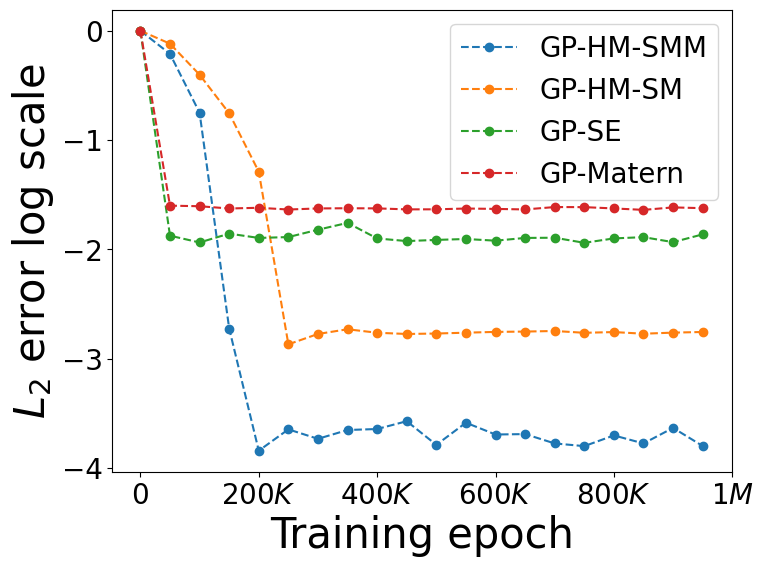

In [5]:

kernel_log = {}

kernel_list =  ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
# save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=50-logdet-1-beta-200'
save_name = 'llk_weight-500.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=40-logdet-1beta-200'

for kernel_name in kernel_list:
    prefix = '../result_log/advection-sin/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
    model, preds,log_dict = load_and_predict_advection(prefix, save_name)
    preds = np.nan_to_num(preds)
    kernel_log[kernel_name] = log_dict['err_list']





label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']
# plot the error curve for each kernel
plt.figure(figsize=(8, 6))
for i,kernel_name in enumerate(kernel_list):
    # plt.scatter( log_dict['epoch_list'], np.log(kernel_log[kernel_name]), label=kernel_name)
    # plt.plot( log_dict['epoch_list'], np.log(kernel_log[kernel_name]), label=kernel_name)
    # plot with line and marker
    plt.plot( log_dict['epoch_list'], np.log10(kernel_log[kernel_name]), label=label_list[i], marker='o', linestyle='dashed')

plt.legend(loc=1, fontsize=20)

# set y-axix name and x-axis name
plt.ylabel('$L_2$ error log scale', fontsize=30)
plt.xlabel('Training epoch',fontsize=30)

# x,y-stick
x_tick_label =[[0,200000,400000,600000,800000,1000000],['0','$200K$','$400K$','$600K$', '$800K$','$1M$']]
y_ticks_label = [[-1.5,0,1],['-1.5','0','1']]

plt.xticks(x_tick_label[0],x_tick_label[1],fontsize=20)

# y-stick
plt.yticks([0,-1,-2,-3,-4],fontsize=20)

# plt.title(model.trick_paras['equation'])

        # to save figure
equation_name = 'advection'
prefix = '../figs/converge/' + equation_name + '/' 

# create folder if not exist
if not os.path.exists(prefix):
    os.makedirs(prefix)
    # save as pdf and png
plt.savefig(prefix + 'converge.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'converge.png', dpi=300, bbox_inches='tight')


equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_Cos_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_Cos_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_1d
equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_1d


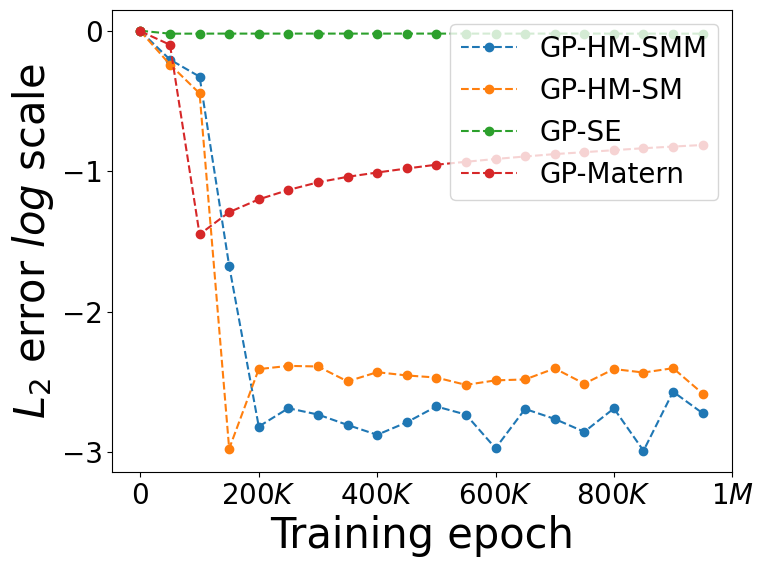

In [6]:

kernel_log = {}

kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']
# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name ='llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1-x-2pi'

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_2d-sin_add_cos/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
    model, preds,log_dict = load_and_predict_2d(prefix, save_name)
    preds = np.nan_to_num(preds)
    kernel_log[kernel_name] = log_dict['err_list']
    




label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']
# plot the error curve for each kernel
plt.figure(figsize=(8, 6))
for i,kernel_name in enumerate(kernel_list):
    # plt.scatter( log_dict['epoch_list'], np.log(kernel_log[kernel_name]), label=kernel_name,marker='o', linestyle='dashed')
    plt.plot( log_dict['epoch_list'], np.log10(kernel_log[kernel_name]), label=label_list[i],marker='o', linestyle='dashed')

plt.legend(loc=1, fontsize=20)

# set y-axix name and x-axis name
plt.ylabel('$L_2$ error $log$ scale', fontsize=30)
plt.xlabel('Training epoch',fontsize=30)
# x-stick
x_tick_label =[[0,200000,400000,600000,800000,1000000],['0','$200K$','$400K$','$600K$', '$800K$','$1M$']]

plt.xticks(x_tick_label[0],x_tick_label[1],fontsize=20)
# y-stick
plt.yticks([0,-1,-2,-3,],fontsize=20)


# plt.title(model.trick_paras['equation'])



equation_name = 'poisson_2d-sin_add_cos'
prefix = '../figs/converge/' + equation_name + '/' 

# create folder if not exist
if not os.path.exists(prefix):
    os.makedirs(prefix)
    # save as pdf and png
plt.savefig(prefix + 'converge.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'converge.png', dpi=300, bbox_inches='tight')

# plt.savefig(prefix + 'converge-no-legend.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(prefix + 'converge-no-legend.png', dpi=300, bbox_inches='tight')


equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_Cos_1d
equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_Cos_1d


Text(0.5, 1.0, 'poisson_2d-sin_add_cos')

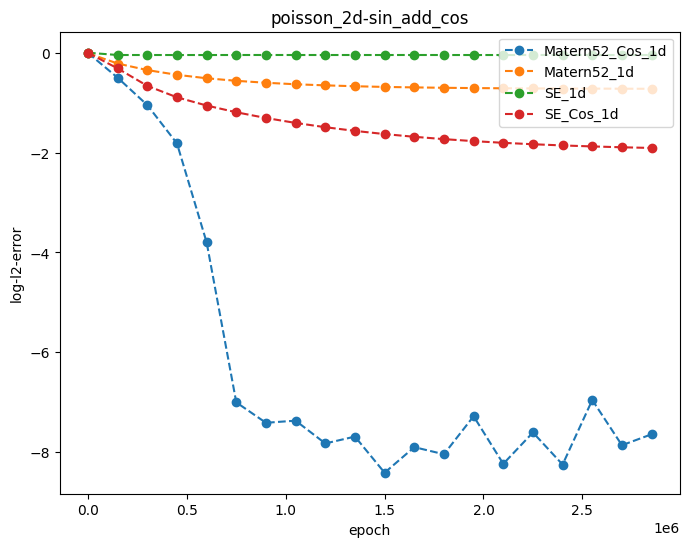

In [24]:

kernel_log = {}

kernel_list = ['Matern52_Cos_1d','Matern52_1d','SE_1d','SE_Cos_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name ='llk_weight-200.0-nu-1-Q-30-epoch-3000000-lr-0.0100-freqscale=30-logdet-1'

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_2d-sin_add_cos/kernel_%s/epoch_3000000/Q30/'%(kernel_name)
    model, preds,log_dict = load_and_predict_2d(prefix, save_name)
    preds = np.nan_to_num(preds)
    kernel_log[kernel_name] = log_dict['err_list']




# plot the error curve for each kernel
plt.figure(figsize=(8, 6))
for kernel_name in kernel_list:
    # plt.scatter( log_dict['epoch_list'], np.log(kernel_log[kernel_name]), label=kernel_name,marker='o', linestyle='dashed')
    plt.plot( log_dict['epoch_list'], np.log(kernel_log[kernel_name]), label=kernel_name,marker='o', linestyle='dashed')

plt.legend(loc=1)

# set y-axix name and x-axis name
plt.ylabel('log-l2-error')
plt.xlabel('epoch')
# x-stick
# plt.xticks(log_dict['epoch_list'], rotation=45)

plt.title(model.trick_paras['equation'])
